### Import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Import data

In [6]:
data = pd.read_csv('../ML1/arbres_grenoble_epsg4326.csv')

In [9]:
data.head(5)

,elem_point_id,code,nom,genre,genre_desc,categorie,categorie_desc,sous_categorie,sous_categorie_desc,code_parent,...,diametrearbre,causeabattage,collectivite,stationmetro,hauteurarbre,portarbre,structure,forme,typenature,geo_point_2d
0,5259,ESP11324,AR11324,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP175,...,NaN,NaN,Grenoble Alpes Métropole,NaN,NaN,NaN,Métropole de Grenoble,Tige,NaN,"45.175673908288694,5.749421158918044"
1,1478,ESP27796,AR27796,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP175,...,NaN,NaN,Grenoble Alpes Métropole,NaN,NaN,NaN,Métropole de Grenoble,Tige,NaN,"45.175689031385716,5.749449836814956"
2,13139,ESP4323,AR4323,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP1009,...,NaN,NaN,Grenoble Alpes Métropole,NaN,de 10 m à 20 m,Libre,Métropole de Grenoble,NaN,Libre,"45.175403375194556,5.748482643586666"
3,24132,ESP7132,AR7132,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP1009,...,NaN,NaN,Ville de Grenoble,NaN,de 10 m à 20 m,NaN,Ville de Grenoble,NaN,NaN,"45.17542427590123,5.748557574259692"
4,23970,ESP15162,AR15162,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP625,...,NaN,NaN,Ville de Grenoble,NaN,Moins de 10 m,NaN,Ville de Grenoble,NaN,NaN,"45.17760812265083,5.749356960358159"


In [11]:
data.columns

Index(['elem_point_id', 'code', 'nom', 'genre', 'genre_desc', 'categorie',
       'categorie_desc', 'sous_categorie', 'sous_categorie_desc',
       'code_parent', 'code_parent_desc', 'adr_secteur', 'bien_reference',
       'genre_bota', 'espece', 'variete', 'stadededeveloppement', 'equipe',
       'remarques', 'anneedeplantation', 'raisondeplantation',
       'traitementchenilles', 'courrier', 'identifiantplu',
       'typeimplantationplu', 'intituleprotectionplu', 'anneeabattage',
       'essouchement', 'diametrearbre', 'causeabattage', 'collectivite',
       'stationmetro', 'hauteurarbre', 'portarbre', 'structure', 'forme',
       'typenature', 'geo_point_2d'],
      dtype='object')

Variable 'annee de plantation'

In [37]:
#garder la variable initiale 'data' sans aucun changement
arbres_gre = data

In [38]:
arbres_gre.describe()

,elem_point_id,adr_secteur,equipe,anneedeplantation,courrier,identifiantplu,anneeabattage,essouchement,diametrearbre,causeabattage
count,31736.000000,31736.000000,0.0,30144.000000,0.0,600.000000,0.0,0.0,0.0,0.0
mean,20393.645544,3.826758,NaN,1990.018644,NaN,87.856667,NaN,NaN,NaN,NaN
std,12759.662993,1.718467,NaN,17.992314,NaN,60.657935,NaN,NaN,NaN,NaN
min,1.000000,1.000000,NaN,1900.000000,NaN,2.000000,NaN,NaN,NaN,NaN
25%,9656.750000,2.000000,NaN,1975.000000,NaN,67.000000,NaN,NaN,NaN,NaN
50%,19424.500000,4.000000,NaN,1987.000000,NaN,70.000000,NaN,NaN,NaN,NaN
75%,29254.250000,5.000000,NaN,2006.000000,NaN,70.000000,NaN,NaN,NaN,NaN
max,46807.000000,6.000000,NaN,2022.000000,NaN,358.000000,NaN,NaN,NaN,NaN


In [39]:
# identifying the existence of nan values or non numeric (.info())
arbres_gre['anneedeplantation'].unique()

array([1975., 2009., 1970.,   nan, 1995., 2022., 1993., 1988., 1980.,
       2005., 2006., 1978., 1965., 2007., 2010., 1982., 1950., 1955.,
       1981., 1971., 2001., 1990., 1977., 1960., 1944., 1991., 2012.,
       1992., 1986., 2004., 1924., 1999., 1998., 1979., 2003., 2002.,
       1987., 1996., 2000., 1994., 2011., 1984., 1983., 1976., 1985.,
       1966., 1989., 1972., 2008., 1969., 1968., 1997., 2013., 2016.,
       2018., 2015., 2017., 2019., 2020., 1967., 1973., 1974., 2021.,
       2014., 1900., 1959., 1964.])

In [40]:
# Dropping nan values on the annedeplantation column
# dropping unnecessary columns (checked down when using describe)
arbres_gre = (arbres_gre.dropna(subset='anneedeplantation')
                        .drop(['equipe','courrier','anneeabattage',
       'essouchement', 'diametrearbre', 'causeabattage'], axis=1)
              
)

In [42]:
arbres_gre.columns

Index(['elem_point_id', 'code', 'nom', 'genre', 'genre_desc', 'categorie',
       'categorie_desc', 'sous_categorie', 'sous_categorie_desc',
       'code_parent', 'code_parent_desc', 'adr_secteur', 'bien_reference',
       'genre_bota', 'espece', 'variete', 'stadededeveloppement', 'remarques',
       'anneedeplantation', 'raisondeplantation', 'traitementchenilles',
       'identifiantplu', 'typeimplantationplu', 'intituleprotectionplu',
       'collectivite', 'stationmetro', 'hauteurarbre', 'portarbre',
       'structure', 'forme', 'typenature', 'geo_point_2d'],
      dtype='object')

In [43]:
#checking if nans were dropped
arbres_gre['anneedeplantation'].unique()

array([1975., 2009., 1970., 1995., 2022., 1993., 1988., 1980., 2005.,
       2006., 1978., 1965., 2007., 2010., 1982., 1950., 1955., 1981.,
       1971., 2001., 1990., 1977., 1960., 1944., 1991., 2012., 1992.,
       1986., 2004., 1924., 1999., 1998., 1979., 2003., 2002., 1987.,
       1996., 2000., 1994., 2011., 1984., 1983., 1976., 1985., 1966.,
       1989., 1972., 2008., 1969., 1968., 1997., 2013., 2016., 2018.,
       2015., 2017., 2019., 2020., 1967., 1973., 1974., 2021., 2014.,
       1900., 1959., 1964.])

In [44]:
#checking number of years
arbres_gre['anneedeplantation'].value_counts()

anneedeplantation
1975.0    3481
2001.0    1473
1980.0    1397
1970.0    1340
2015.0     998
          ... 
1944.0      26
1959.0      16
1924.0      11
1964.0       6
2021.0       4
Name: count, Length: 66, dtype: int64

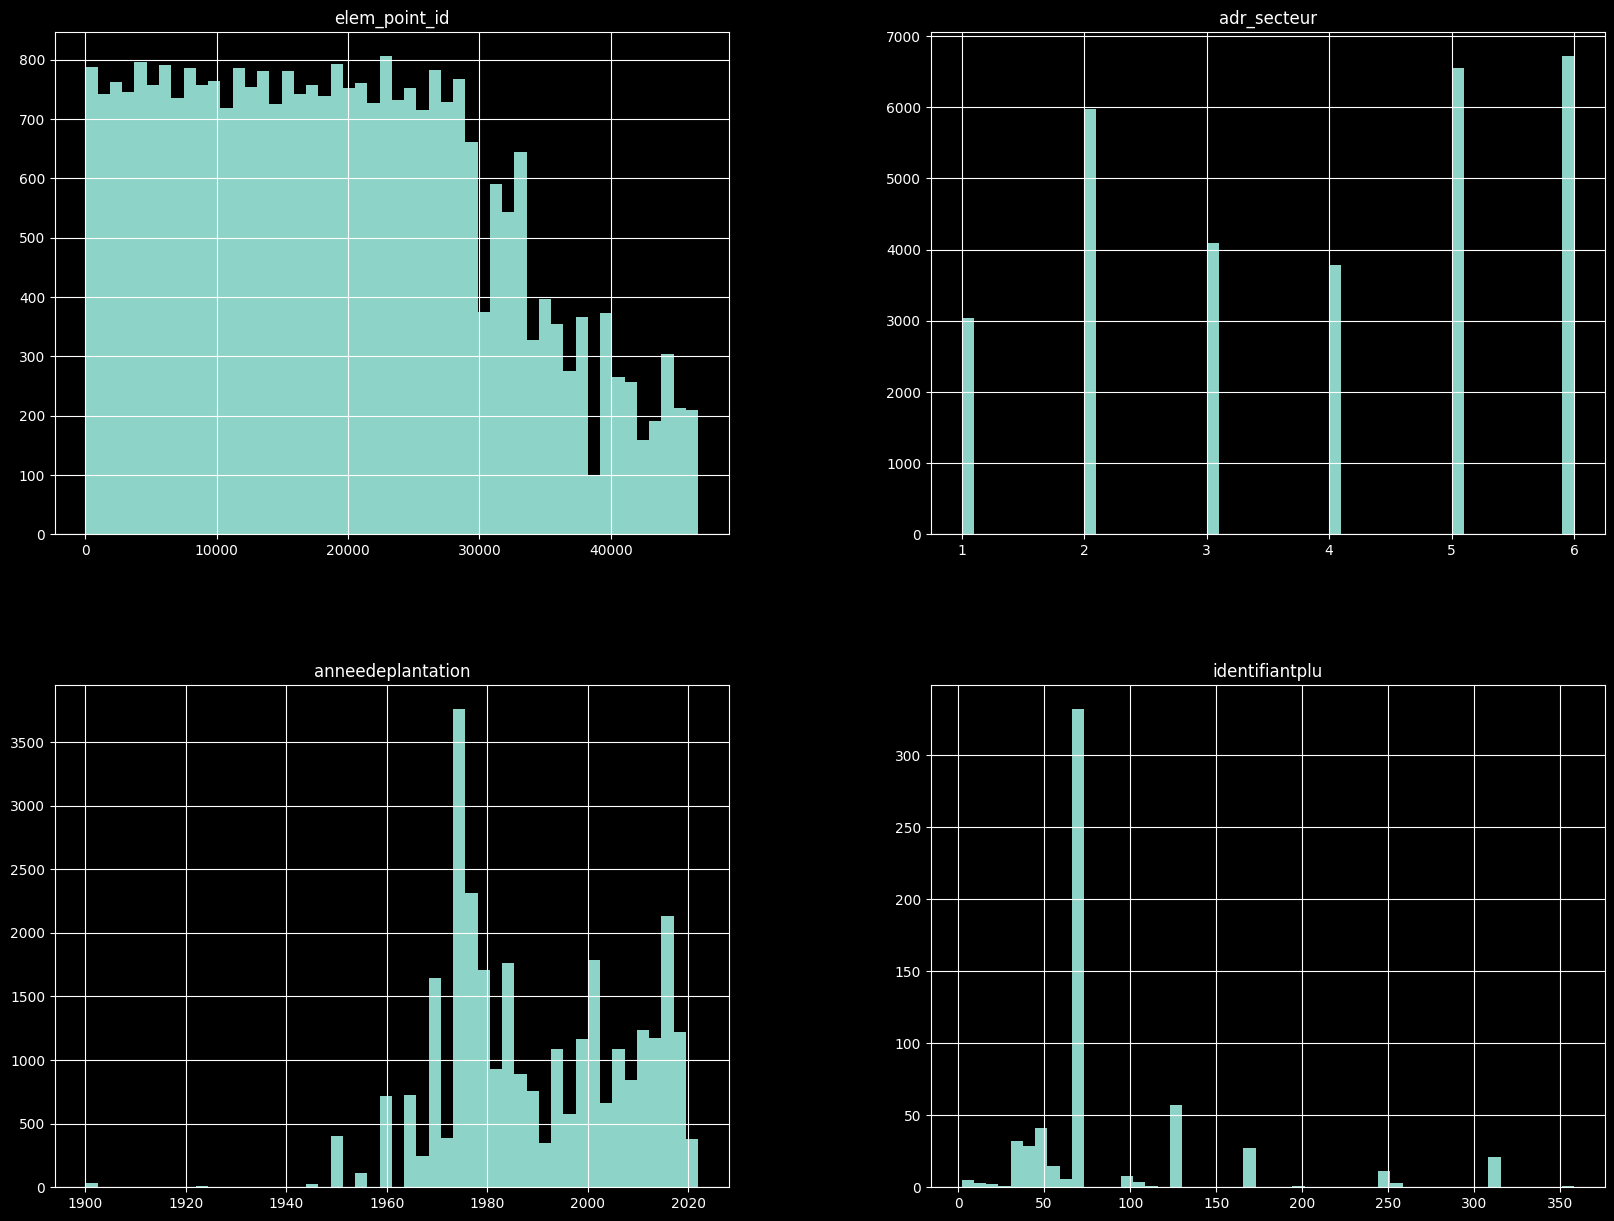

In [45]:
arbres_gre.hist(bins=50, figsize=(20,15))
plt.show()